### 2. หาค่าความเอนเอียงและความแปรปรวนด้วย analytical method และ simulation 
1. แบบจำลองค่าคงที่ *
2. แบบจำลองเชิงเส้นและ 
3. แบบจำลองเชิงเส้นผ่านจุดกำเนิด

2.1 เมื่อกำหนดให้ฟังก์ชันเป้าหมายคือ $sin(\pi x)$ และสุ่มข้อมูลด้วยการแจกแจงแบบเอกรูปออกมา 2 ตัวอย่างในช่วง [-1,1] (Lecture หน้า 18)

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import random


 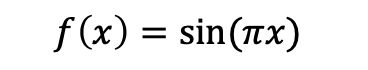

In [18]:
def sin_pi(x):
    return np.sin(np.dot(np.pi, x))

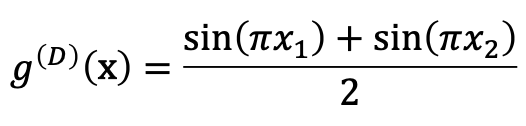

In [19]:
def cons(x):
    return (x[0] + x[1])/ 2

In [20]:
data_x_sin = np.linspace(-1, 1, 100)
data_func_x = sin_pi(data_x_sin) # f(x) function sin*pi
Constant_model = []
n = 100000 # จำนวน random

สุ่ม ข้อมูล 2 จุด จาก $𝑓(𝑥) = sin(𝜋𝑥)$ และ เก็บ Model $G^{(D)}(x)$

In [21]:
for i in range(n):
    sam_x = np.array(random.choices(data_x_sin, k=2))
    sam_sin = sin_pi(sam_x)
    sam_y = cons(sam_sin) # g D(x) function
    Constant_model.append(sam_y)

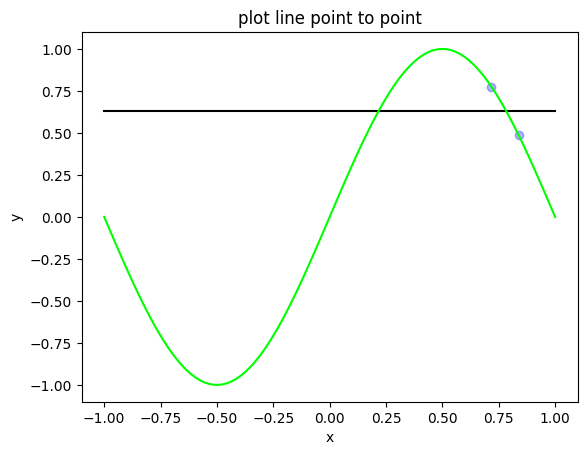

In [22]:
plt.scatter(sam_x, sam_sin, color = "blue", marker='o', alpha=0.3) # plot point data

line_x = np.linspace(-1, 1, 100)
line_y = np.ones(100)*sam_y
plt.plot(line_x, line_y, color = 'black', alpha=1) # plot line ตัดจุด data

plt.plot(data_x_sin, data_func_x, color = "#00FF00") # plot f(x)
plt.xlabel("x")
plt.ylabel("y")
plt.title('plot line point to point')
plt.axis([-1.1, 1.1, -1.1,  1.1])
plt.show()

mean function Constan = -0.00017641984656589733


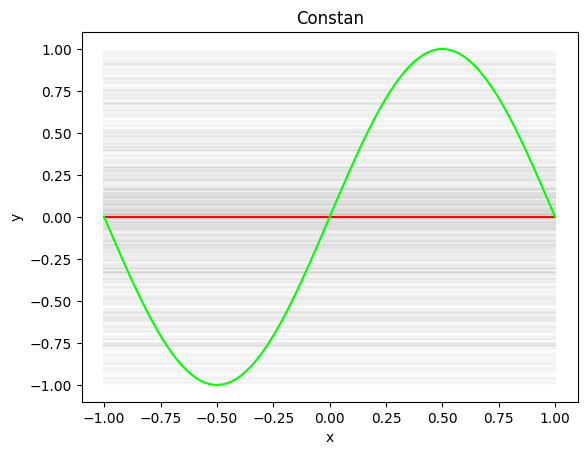

In [23]:
# mean g(x) 
mean_Constan = np.mean(Constant_model)

print(f"mean function Constan = {mean_Constan}")

for i in range(1000):
    line_y = np.ones(100)*Constant_model[i]
    plt.plot(line_x, line_y, color = 'black', alpha=0.01) # plot line each g(x) 

sample_x = np.linspace(-1, 1, 100)
func_g = np.ones(100)*mean_Constan
plt.plot(sample_x, func_g, color = 'r', alpha=1)  # plot mean g(x) 

plt.plot(data_x_sin, data_func_x, color = "#00FF00") # plot f(x)
plt.xlabel("x")
plt.ylabel("y")
plt.title('Constan')
plt.axis([-1.1, 1.1, -1.1,  1.1])
plt.show()

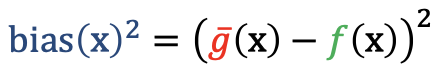
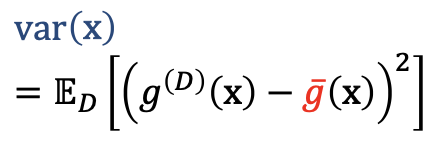

In [24]:
var = []
for modle in Constant_model:
    var.append((modle-mean_Constan)**2)
variance = np.mean(var)
print(f"variance = {variance:.2f}")

bias =  np.mean((func_g - data_func_x)**2)
print(f"bias = {bias:.2f}")

Bias_Variance = bias + variance
print(f"Bias-Variance = {Bias_Variance:.2f}")

variance = 0.25
bias = 0.50
Bias-Variance = 0.74
